# BAN436 Final project

This is a final project for the NHH course BAN436. In this project we will prepare for the Ames Housing Data competition. We will analyze housing data and use predictive models to predict housing prics using simple linear regression.

## Task 1: Import and explore the data

In [98]:
# import all necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

Now that we have all necessary libraries for this project, let's import the data.

In [99]:
# import the data
data = pd.read_csv('AmesHousing.csv')

data

,ID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


There seem to be 2930 observations and 81 variables. The first variable is the house ID and last is selling price, so that leaves us with 79 potential explanatory variables. Let's get some more info about the data set.

In [100]:
# get descriptive statistics
data['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [101]:
# get info about the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2930 non-null   int64  
 1   MSSubClass     2930 non-null   int64  
 2   MSZoning       2930 non-null   object 
 3   LotFrontage    2440 non-null   float64
 4   LotArea        2930 non-null   int64  
 5   Street         2930 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2930 non-null   object 
 8   LandContour    2930 non-null   object 
 9   Utilities      2930 non-null   object 
 10  LotConfig      2930 non-null   object 
 11  LandSlope      2930 non-null   object 
 12  Neighborhood   2930 non-null   object 
 13  Condition1     2930 non-null   object 
 14  Condition2     2930 non-null   object 
 15  BldgType       2930 non-null   object 
 16  HouseStyle     2930 non-null   object 
 17  OverallQual    2930 non-null   int64  
 18  OverallC

Given the amount of variables, we focus on the sale price to keep it simple. The average price is $180,796.06. The cheapes house was sold for $12,789 and the most expensive one for $755,000. it is worth noting that there is quite a gap between these extremes and lower and upper quartiles. We can assume the presence of a few outliers on both sides.

As for the variables themselves, we notice a majority of categorical variables (43). 36 variables are numerical, some integers other floats. From the data description available we need to also consider some categorical variables are perceived as numerical. We can also already see that there are plenty of missing values in the dataset. For example 'Alley' has only 198 non-null observations out of 2930. This is not because the data is missing but because there is no alley access. Let's look at missing values.

In [102]:
# count missing values
na_values = data.isnull().sum()[data.isnull().sum() > 0]

na_values

LotFrontage      490
Alley           2732
MasVnrType      1775
MasVnrArea        23
BsmtQual          80
BsmtCond          80
BsmtExposure      83
BsmtFinType1      80
BsmtFinSF1         1
BsmtFinType2      81
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1422
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2917
Fence           2358
MiscFeature     2824
dtype: int64

We see many variables have missing data. However, a lot of them are not actually missing, rather they cannot be measured because the feature does not exist. We can see there are approximately 80 homes without basement, 160 homes without garage and 1422 homes without a fireplace. Many are also without pools and fences. Since there is a lot of "missing" data regarding these variables, we cannot simply drop the observations. We will have to assign a value to the instead.

Since we will be predicting home prices with simple regression, there is no need to keep all variables. Let's look at the correlation between sales price and other variables. We can drop those that have no or very weak correlation later.

In [103]:
# get correlation
data.corr(numeric_only=True)

,ID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
ID,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MSSubClass,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
LotFrontage,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
LotArea,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
OverallQual,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
OverallCond,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
YearBuilt,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
YearRemodAdd,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
MasVnrArea,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFinSF1,-0.098375,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914


From a quick analysis we can see that there are quite high correlations between sales price and different variables. The highest are for example overall quality, year of construction or renovation, area of different features. Note that these are only numeric variables. We will transform the data later and choose the variables then.

## Task 2: Visualize the data

We can also analyze tha data visually. Let's create a few plots to understand possible relationships of the data. Firs, let's look at the dependent variable 'SalePrice'.

In [104]:
# histogram
plot_1 = px.histogram(
    data,
    x='SalePrice'
)

plot_1.show()

We can see that there are noticable outliers of homes that cost more that $500k. These observations might affect results significnatly so it is worht considering droping these.

Next, let's consider the correlations. We noticed that there is a strong correlation between sales price and other variables. Scatterplots should give us a better idea what kind of relationship it is (linear or other). We will use a function so we can choose any variables anytime.

In [105]:
# scatterplot function
def print_scatterplots(data, dep, expl):
    for var in expl:
        plot = px.scatter(
            data,
            x=var,
            y=dep,
            title=f'{dep} X {var}'
        )

        plot.show()

In [106]:
print_scatterplots(data, 'SalePrice', ['OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF'])

We can see possible linear relationships between sales price and other explanatory variables. We can reuse the function with other variables if necessary.

## Task 3: Data wrangling

Now, the time has come to address the flaws of the data. We need to handle the missing values, transform string data to categorical variables, remove unwanted outliers and decide on the variables we will use for predictions.

#### Missing values

There are 27 variables with missing values. We need to identify truly missing values and data unavailable for simply not existing. Let's assume that missing values in numeric variables are labeled correctly as missing. We will get rid of these observations as there should not be that many of them. This also allows us to keep the same observations for each simple regression, it will be easier to compare the results.

In [107]:
# get a copy of the data to clean
data_clean = data.copy()

# filter and delete missing values from numeric variables
data_clean = data_clean.dropna(subset=data_clean[na_values.index].select_dtypes('float').columns)
data_clean = data_clean.dropna(subset=data_clean[na_values.index].select_dtypes('int').columns)

na_values_clean = data_clean.isnull().sum()[data_clean.isnull().sum() > 0]

data_clean[na_values_clean.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2274 entries, 0 to 2929
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Alley         162 non-null    object
 1   MasVnrType    913 non-null    object
 2   BsmtQual      2223 non-null   object
 3   BsmtCond      2223 non-null   object
 4   BsmtExposure  2220 non-null   object
 5   BsmtFinType1  2223 non-null   object
 6   BsmtFinType2  2222 non-null   object
 7   Electrical    2273 non-null   object
 8   FireplaceQu   1174 non-null   object
 9   PoolQC        12 non-null     object
 10  Fence         445 non-null    object
 11  MiscFeature   74 non-null     object
dtypes: object(12)
memory usage: 231.0+ KB


Now we have data where missing values are only for string (object) type variables. Notice that the code before also dropped 4 variables that had the same missing observations. Lucky us now have to deal with only 12 variables. After consulting the data description file, we see that except "Electrical" variable, all other are simply missing the features, not observations. Lets drop the one observation for "Electrical" and replace the NA values of other variables with "none".

In [108]:
# drop missing values for "electrical" variable
data_clean = data_clean.dropna(subset='Electrical')

# replace other missing values with "none"
data_clean = data_clean.fillna('none')

data_clean.isna().sum() # no missing values

ID               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

#### Categorical variables

In this section we will need to transform and recode some of the variables. There are four types of variables we need to deal with:
* Categorical as numeric (ordered)
* Categorical as numeric (unordered)
* Categorical as string (ordered)
* Categorical as string (unordered)

With pandas, it is easy to transform data into categorical type. To speed things up let's first get a list of categorical variables that should be ordered and a list of those unordered. In order to do this we need to consult the data description once again and hard code these variables.


In [109]:
# create a list of categorical variables that should be ordered
category_ordered = ['LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
                    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

# select all columns with object type
category_unordered = data_clean.select_dtypes('object')

# filter out all columns that are not in ordered list
category_unordered = [col for col in category_unordered.columns if col not in category_ordered]

# append categorical variables that are numeric
category_unordered.append('MSSubClass')

Unfortunately, there is no automatic way for python to know in what order should the variables be categorized. For that purpose we will create a list of sets that correspond to all possible ordered categories (at least for our chosen ordered variables). The order is low to high (undesirable to desirable) as that is how pandas will deduce the order.

In [110]:
# define categories for ordered variables low to high
categories = [set(range(1, 11)),
              {'none', 'Po', 'Fa', 'TA', 'Gd', 'Ex'},
              {'Sev', 'Mod', 'Gtl'},
              {'none', 'No', 'Mn', 'Av', 'Gd'},
              {'none', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'},
              {'none', 'Unf', 'RFn', 'Fin'},
              {'none', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'}]

Now let's create a function to convert the required data into categorical variables, either ordered or unordered. We can always change the variables to convert but we need to have ready corresponding ordered category for all variables.

In [111]:
# function to convert required columns
def categorise(data, cats, ord, unord):
    # assign data to its variable
    data = data

    # categorise all unordered variables
    for var in unord:
        data[var] = data[var].astype('category')
    
    # categorise all ordered variables
    for var in ord:
        set_var = set(data[var])
        converted = False # check if all variables have been converted        

        # match the column with its correct categories
        for cat in cats:
            if set_var.issubset(cat):
                data[var] = pd.Categorical(values=data[var], categories=cat, ordered=True)
                converted = True # this variable has been successfully converted
                break
            
        # print all variables that have not been converted    
        if converted == False:
            print(f'The ordered variable {var} does not match with any provided categories. Please add correct set of categories.')


    return data
    

Now we utilize the newly created function. We see that there are no object type columns left. Instead we have 46 category type variables.

In [112]:
data_clean = categorise(data_clean, categories, category_ordered, category_unordered)

data_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2273 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             2273 non-null   int64   
 1   MSSubClass     2273 non-null   category
 2   MSZoning       2273 non-null   category
 3   LotFrontage    2273 non-null   float64 
 4   LotArea        2273 non-null   int64   
 5   Street         2273 non-null   category
 6   Alley          2273 non-null   category
 7   LotShape       2273 non-null   category
 8   LandContour    2273 non-null   category
 9   Utilities      2273 non-null   category
 10  LotConfig      2273 non-null   category
 11  LandSlope      2273 non-null   category
 12  Neighborhood   2273 non-null   category
 13  Condition1     2273 non-null   category
 14  Condition2     2273 non-null   category
 15  BldgType       2273 non-null   category
 16  HouseStyle     2273 non-null   category
 17  OverallQual    2273 non-null   categor

#### Remove outliers

As we've noticed there were a few outliers in the data set. For example some homes have been sold well over $500k, others under $20k. To decide whether these are true outliers that will skew our results we will use Z-score.

In [113]:
# import functionc to calculate z-score
from scipy import stats

# calculte absolute value of z-scores for sales price
z_scores = np.abs(stats.zscore(data_clean['SalePrice']))

# keep only rows with z-score less than 3
data_clean = data_clean[z_scores < 3]

# check new max and min
print(data_clean['SalePrice'].max())
print(data_clean['SalePrice'].min())

data_clean




426000
12789


,ID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,none,Reg,Lvl,AllPub,...,0,none,MnPrv,none,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,none,IR1,Lvl,AllPub,...,0,none,none,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,none,IR1,Lvl,AllPub,...,0,none,MnPrv,none,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,923250060,20,RL,80.0,17400,Pave,none,Reg,Low,AllPub,...,0,none,none,none,0,5,2006,WD,Normal,160000
2924,923251180,20,RL,160.0,20000,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,9,2006,WD,Abnorml,131000
2925,923275080,80,RL,37.0,7937,Pave,none,IR1,Lvl,AllPub,...,0,none,GdPrv,none,0,3,2006,WD,Normal,142500
2928,924100070,20,RL,77.0,10010,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,4,2006,WD,Normal,170000


We can see that according to z-score the cheapest homes are not actually outliers. On the other hand we removed observations of expensive homes.

Finally, let's fix some column names to not contain nubers at the beginning of their name. This will result in errors when constructing the formula for our model. Lastly, let's drop the ID column and put the sale price in its own series.

In [114]:
# change the columns names
data_clean = data_clean.rename(columns={'1stFlrSF': 'FirstFlrSF',
                                        '2ndFlrSF': 'SecondFlrSF',
                                        '3SsnPorch': 'ThreeSsnPorch'})

# drop ID column
data_fit = data_clean.drop(columns=['ID', 'SalePrice'])

# separate sale price
sale_price = data_clean['SalePrice']

## Task 4: Predict sale price

Our goal in this task is to predict the sale price of homes using simple regressions. We will make a separate model for each explanatory variable. Since we transformed ll of our variables, we will use all of them. The ones not suitable will result into worse predictions and we can simply focus on the better results. This is how each model will look like: 𝑆𝑎𝑙𝑒𝑃𝑟𝑖𝑐𝑒 = 𝛼 + 𝛽 × 𝑒𝑥𝑝𝑙𝑎𝑛𝑎𝑡𝑜𝑟𝑦_𝑣𝑎𝑟𝑖𝑎𝑏𝑙𝑒

First, we create a function that will fit the models and calculate RMSE for their predictions.

In [115]:
# create function to fit and store the models
def fit_models(data, true):
    # create a list of model names based on the explanatory variable
    model_names = data.columns

    # create an empty list to store RMSE
    RMSE = []

    # get a model for every explanatory variable and their predictions
    for column in data.columns:
        # fit the model
        df = pd.DataFrame()
        df['SalePrice'] = true
        df[column] = data[column]
        
        formula = f'SalePrice ~ {column}'
        model = smf.ols(formula, data=df)
        model = model.fit()

        # get the predictions, calculate and store RMSE
        pred = model.predict(df[column])
        RMSE_calc = np.sqrt((np.mean((df['SalePrice'] - pred)**2)))
        RMSE.append(RMSE_calc)
    
    # create a dataframe to store the results
    results = pd.DataFrame()
    results['Explanatory variable'] = model_names
    results['RMSE'] = RMSE

    return results




Now we can get all results and find out the best model based on RMSE.

In [116]:
# get the results of all models
results = fit_models(data_fit, sale_price)

results.sort_values(by='RMSE').head()

,Explanatory variable,RMSE
16,OverallQual,39023.853345
11,Neighborhood,45637.791327
29,BsmtQual,48857.334502
26,ExterQual,50292.052098
52,KitchenQual,51280.832128


We can see that the overall quality of home is the best predictor. It is followed by neighborhood, basement height, external material quality and kitchen quality. Now let's visualise how well the predictor does.

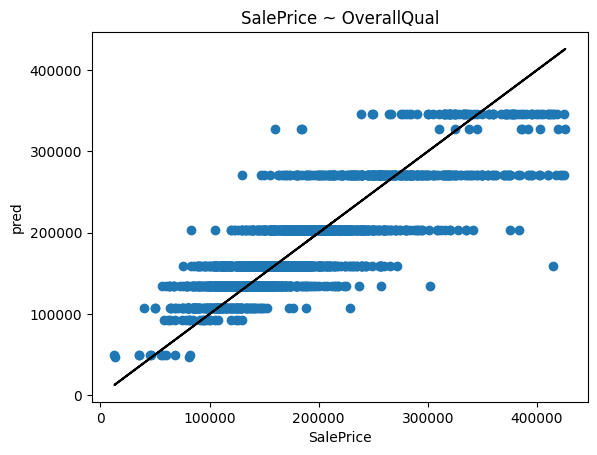

In [117]:
# get all predictions for OverallQual
model = smf.ols(formula='SalePrice ~ OverallQual', data=data_clean).fit()

data_clean["Pred_OverallQual"] = model.predict(data_clean['OverallQual'])

# create a scatterplot with a 45 degrees reference line
fig, ax = plt.subplots()

ax.plot(data_clean['SalePrice'], data_clean['SalePrice'], color = 'black')
ax.scatter(data_clean['SalePrice'], data_clean['Pred_OverallQual'])

# Add axis labels
ax.set_xlabel('SalePrice')
ax.set_ylabel('pred')

# Add title
ax.set_title('SalePrice ~ OverallQual')

plt.show()

As we can see, because overall quality is a categorical variable, our simple regression predicts only 10 possible home prices. This causes our model to both overpredict and underpredict the sale price. For a simple regression this is still the best available model, although, multiple regression would have been more suitable for this kind of problem. For example neighbourhood has the second lowest RMSE and has a lot of informational power. If combined with overall quality I believe we could get significantly better results that with a simple regression.

## Task 5: Personal statement

In this project many online resources have been used in order to make the code functional. These resources are mostly Stackoverflow discussions and library documentations (pandas, plotly, statsmodels, etc.), which were used for inspiration to make the code clearer, discovering different functions and help with the syntax. However, no code has been directly copied. Generative AI, particulary ChatGPT has been used to assist with the code debugging and interpreting error messages.